# Term Project: The Effects of Multiple Parameters on Student Performance

Long Nguyen,
Strahinja Radakovic

November 13th, 2024

In [1]:
# import the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import warnings
warnings.filterwarnings('ignore') #ignoring some deprication warnings

### Dataset

The dataset used can be found at the following [link](https://archive.ics.uci.edu/dataset/320/student+performance)

In [3]:
# Loading the two datasets. 

student_mathematics_data = pd.read_csv('student-mat.csv', sep=";")
student_portugese_language_data = pd.read_csv('student-por.csv', sep=";")

# Appending the mathematics and portugese language data to one another

student_data = pd.concat([student_mathematics_data, student_portugese_language_data])

student_data_original = student_data.copy()

In [4]:
# Get a summary of the dataset with .info
student_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher      10

In [5]:
# Cleaning Data

student_data = student_data.drop(['school', 'address', 'reason', 'G1', 'G2'], axis = 1) 

# dropping the school, address, reason, G1 and G2 columns. school could prove to be a valuable attribute
# in a larger scale study, but since the dataset only contains two schools, we chose to remove it.

# likewise, the address column could prove to be valuable, but a lot more analysis is needed to extract the value,
# such as: the average income in the geographic area, crime rates in the area, etc.

# reason is a column we are generally uninterested in, so we decided to drop it (it doesn't seem too relevant)

# G1 and G2 are columns which tell the first and second period grades respectivly.
# As we will be using G3 (final grade) to assess student performance, G1 and G2 are not neccessary.

student_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   famsize     1044 non-null   object
 3   Pstatus     1044 non-null   object
 4   Medu        1044 non-null   int64 
 5   Fedu        1044 non-null   int64 
 6   Mjob        1044 non-null   object
 7   Fjob        1044 non-null   object
 8   guardian    1044 non-null   object
 9   traveltime  1044 non-null   int64 
 10  studytime   1044 non-null   int64 
 11  failures    1044 non-null   int64 
 12  schoolsup   1044 non-null   object
 13  famsup      1044 non-null   object
 14  paid        1044 non-null   object
 15  activities  1044 non-null   object
 16  nursery     1044 non-null   object
 17  higher      1044 non-null   object
 18  internet    1044 non-null   object
 19  romantic    1044 non-null   object
 20  famrel      10

In [6]:
# Encoding

# Encoding yes/no columns into 1/0's
binary_columns = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
student_data[binary_columns] = student_data[binary_columns].replace({'yes': 1, 'no': 0})
student_data['Pstatus'] = student_data['Pstatus'].replace({'T': 1, 'A': 0})

# One hot encoding columns that are not numeric and not binary
encoded_student_data = pd.get_dummies(student_data, columns=
                                      ["sex", 
                                       "famsize",  
                                       "Mjob", 
                                       "Fjob", 
                                       "guardian",
                                      ])

In [7]:
# Count the number of missing values in each column
encoded_student_data.head()

,age,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,guardian_father,guardian_mother,guardian_other
0,18,0,4,4,2,2,0,1,0,0,...,False,False,False,False,False,False,True,False,True,False
1,17,1,1,1,1,2,0,0,1,0,...,False,False,False,False,True,False,False,True,False,False
2,15,1,1,1,1,2,3,1,0,1,...,False,False,False,False,True,False,False,False,True,False
3,15,1,4,2,1,3,0,0,1,1,...,False,False,False,False,False,True,False,False,True,False
4,16,1,3,3,1,2,0,0,1,1,...,False,False,False,False,True,False,False,True,False,False


In [8]:
encoded_student_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              1044 non-null   int64
 1   Pstatus          1044 non-null   int64
 2   Medu             1044 non-null   int64
 3   Fedu             1044 non-null   int64
 4   traveltime       1044 non-null   int64
 5   studytime        1044 non-null   int64
 6   failures         1044 non-null   int64
 7   schoolsup        1044 non-null   int64
 8   famsup           1044 non-null   int64
 9   paid             1044 non-null   int64
 10  activities       1044 non-null   int64
 11  nursery          1044 non-null   int64
 12  higher           1044 non-null   int64
 13  internet         1044 non-null   int64
 14  romantic         1044 non-null   int64
 15  famrel           1044 non-null   int64
 16  freetime         1044 non-null   int64
 17  goout            1044 non-null   int64
 18  Dalc          

In [9]:
# Split data into features (X) and target (y)
X = encoded_student_data.drop('G3', axis=1)
y = encoded_student_data['G3']

In [10]:
# Split data into Training and Testing sets

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size = 0.2)

### Lasso Regression Model

When implementing a regularized model such as lasso regression, we would be remiss not to implement feature scaling, as lasso regression penalizes large coefficients.

In [11]:
# Checkning feature ranges:

feature_ranges = X.describe().loc[['min', 'max']]

print("Feature Ranges:")
print(feature_ranges)

Feature Ranges:
      age  Pstatus  Medu  Fedu  traveltime  studytime  failures  schoolsup  \
min  15.0      0.0   0.0   0.0         1.0        1.0       0.0        0.0   
max  22.0      1.0   4.0   4.0         4.0        4.0       3.0        1.0   

     famsup  paid  ...  higher  internet  romantic  famrel  freetime  goout  \
min     0.0   0.0  ...     0.0       0.0       0.0     1.0       1.0    1.0   
max     1.0   1.0  ...     1.0       1.0       1.0     5.0       5.0    5.0   

     Dalc  Walc  health  absences  
min   1.0   1.0     1.0       0.0  
max   5.0   5.0     5.0      75.0  

[2 rows x 22 columns]


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Selecting columns to scale
columns_to_scale = ['age', 'absences']

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()

X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_val_scaled[columns_to_scale] = scaler.transform(X_val[columns_to_scale])


# Creating and fitting a pipeline
pipeline = make_pipeline(StandardScaler(), LassoCV(cv=5, random_state=0))
pipeline.fit(X_train_scaled, y_train)

# Cross-validate the model using the pipeline and get the mean R^2 score
cross_val_scores = cross_val_score(pipeline, X_train_scaled, y_train, cv=5, scoring='r2')
print("Mean cross-validation R^2 score: {:.2f}".format(np.mean(cross_val_scores)))

# Evaluate the model on the training and validation sets
print("Training R^2 score: {:.2f}".format(pipeline.score(X_train_scaled, y_train)))
print("Validation R^2 score: {:.2f}".format(pipeline.score(X_val_scaled, y_val)))

# Check the best alpha (regularization strength) chosen by cross-validation
lasso_model = pipeline.named_steps['lassocv']
print("Best alpha chosen by cross-validation: {:.4f}".format(lasso_model.alpha_))
print("Number of features used:", np.sum(lasso_model.coef_ != 0))

Mean cross-validation R^2 score: 0.18
Training R^2 score: 0.23
Validation R^2 score: 0.23
Best alpha chosen by cross-validation: 0.0852
Number of features used: 23


As can be seen from the above results, while our model doesn't overfit or underfit the data, it has low predictive power. As lasso is a linear model, this makes us believe the data might contain significant non-linear patterns, making a lasso a bad choice for the data.

### Decision Tree Model

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold

# selecting parameters for our tree
param_grid = {
    'max_depth': [3, 5, 7, 10, 14, 17, 20, None],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

tree = DecisionTreeRegressor(random_state = 0)

# finding best parameters
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='r2')

outer_cv = KFold(n_splits=5, shuffle=True, random_state=0)

nested_scores = cross_val_score(grid_search, X, y, cv=outer_cv, scoring='r2')

print("Nested cross-validation R^2 scores for each outer fold:", nested_scores)
print("Mean nested cross-validation R^2 score:", nested_scores.mean())
print("Standard deviation of nested cross-validation R^2 score:", nested_scores.std())

Nested cross-validation R^2 scores for each outer fold: [0.03095012 0.2505268  0.25437354 0.1891815  0.11829968]
Mean nested cross-validation R^2 score: 0.1686663290873313
Standard deviation of nested cross-validation R^2 score: 0.08481779091005609


Still, the model performs poorly, even worse than the lasso regresison. To try to improve this, we will implement a random forest model.

### Random Forest Model

In [14]:
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

forest = RandomForestRegressor(random_state = 0)

grid_search_rf = GridSearchCV(estimator=forest, param_grid=param_grid_rf, cv=5, scoring='r2')

# Outer cross-validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=0)

# Perform nested cross-validation
nested_scores_rf = cross_val_score(grid_search_rf, X, y, cv=outer_cv, scoring='r2')

print("Nested cross-validation R^2 scores for each outer fold with Random Forest:", nested_scores_rf)
print("Mean nested cross-validation R^2 score:", nested_scores_rf.mean())
print("Standard deviation of nested cross-validation R^2 score:", nested_scores_rf.std())

Nested cross-validation R^2 scores for each outer fold with Random Forest: [0.30916794 0.24940397 0.23817188 0.2611737  0.23545936]
Mean nested cross-validation R^2 score: 0.2586753678902707
Standard deviation of nested cross-validation R^2 score: 0.026836825957275927


In [15]:
corr_matrix = pd.DataFrame(X).corrwith(pd.Series(y))
print(corr_matrix.sort_values(ascending=False))

higher             0.236578
Medu               0.201472
studytime          0.161629
Fedu               0.159796
internet           0.107064
Fjob_teacher       0.101361
Mjob_health        0.101349
Mjob_teacher       0.084521
famsize_LE3        0.061209
famrel             0.054461
Mjob_services      0.045015
guardian_father    0.042778
Fjob_health        0.042101
nursery            0.039950
activities         0.033998
sex_F              0.031472
famsup             0.013313
guardian_mother    0.009746
Fjob_at_home      -0.021194
Fjob_other        -0.023825
Pstatus           -0.030693
sex_M             -0.031472
Fjob_services     -0.035273
absences          -0.045671
paid              -0.049388
famsize_GT3       -0.061209
freetime          -0.064890
Mjob_other        -0.066051
schoolsup         -0.079346
health            -0.080079
guardian_other    -0.088445
goout             -0.097877
romantic          -0.098363
traveltime        -0.102627
Mjob_at_home      -0.107951
Walc              -0

The poor performance of all three models might be an indication of a non-predictive dataset. Let's take a look at potential flaws with models.

First, lets look if we have highly corrolated features. Having highly corrolated features can introduce redundancy into our model, making it less accurate.

<Axes: >

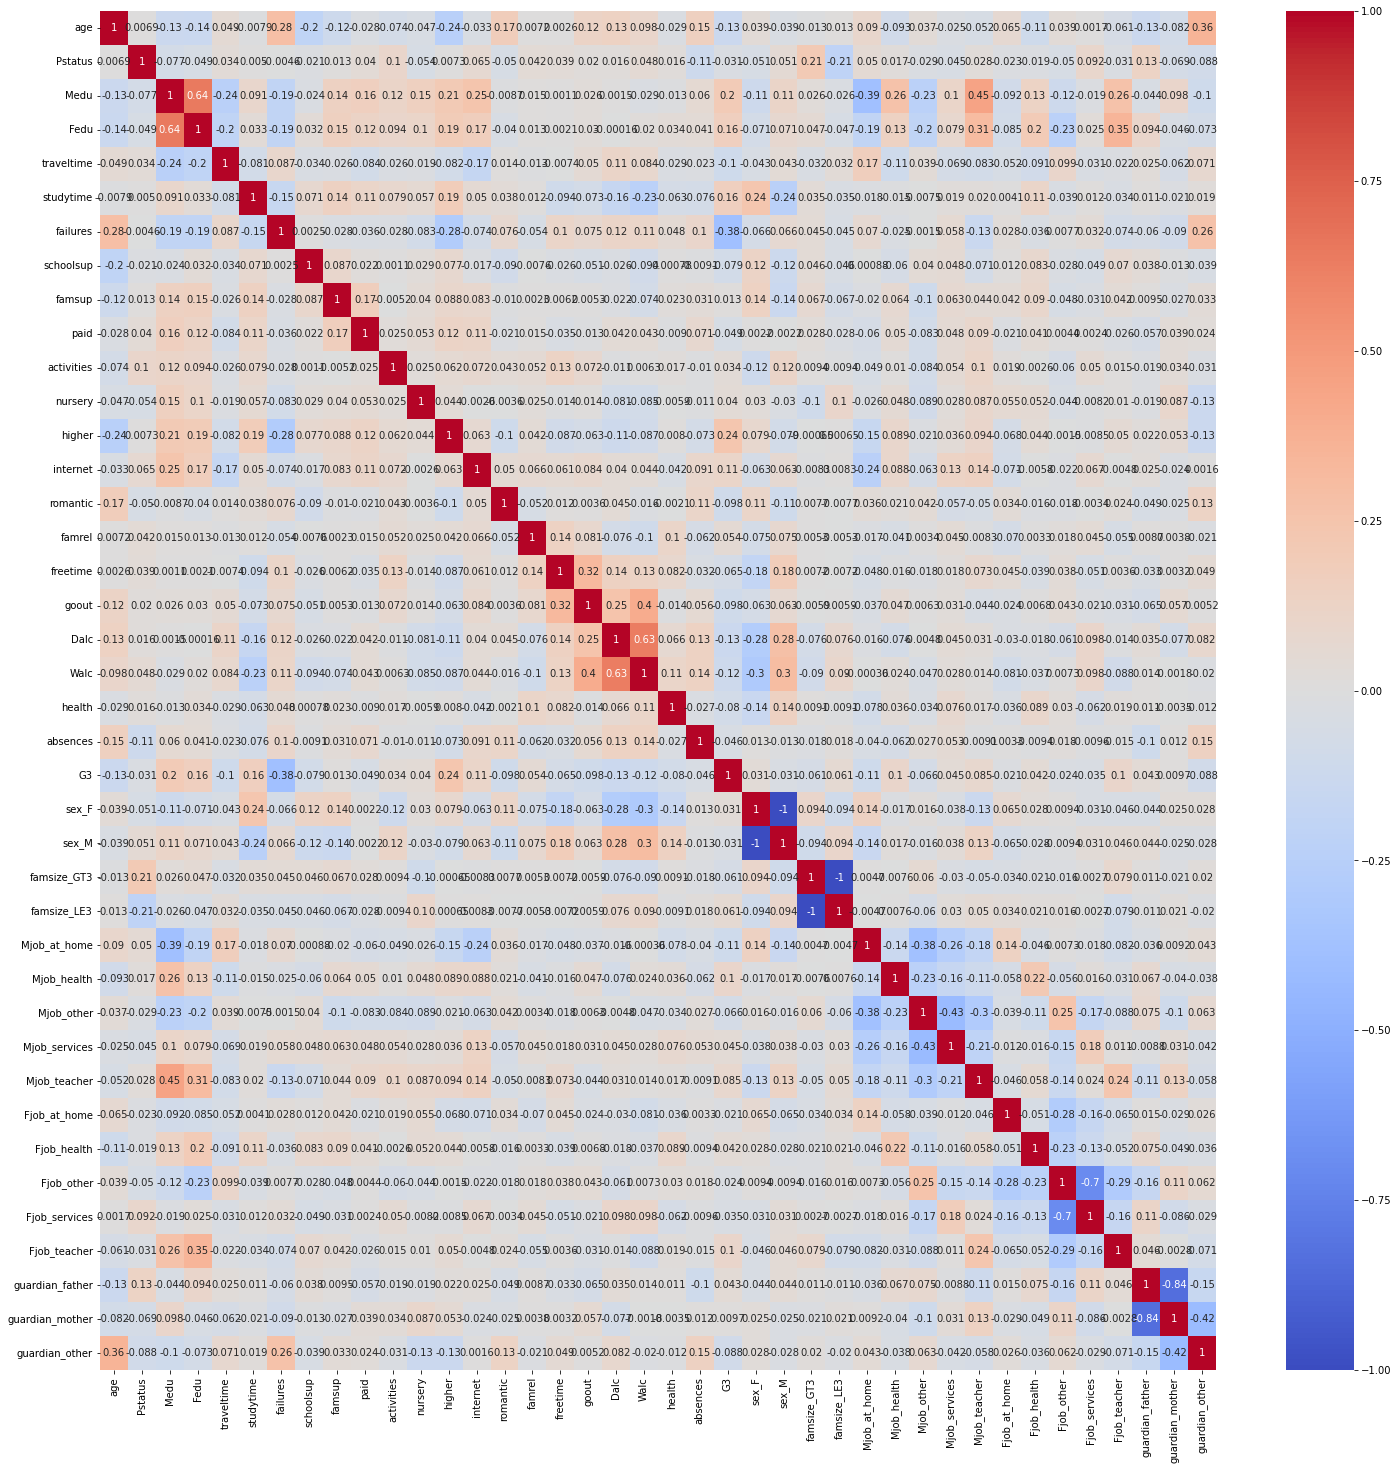

In [16]:
correlation_matrix = encoded_student_data.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

As we can see, some features such as Fedu (father's education) and Medu (mother's education), Dalc (weekday alcohol consumption) and Walc (weekend alcohol consumption) are highly corrolated.

Now lets take a look at the distribution of our target variable, G3.

<Axes: xlabel='G3', ylabel='Count'>

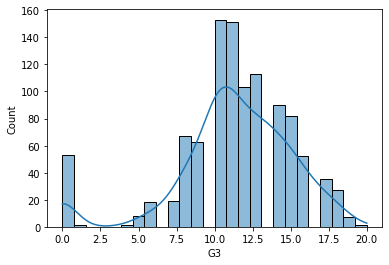

In [17]:
sns.histplot(student_data['G3'], kde=True)


From the distribution above, we can confirm that the target variable, G3, is not excessively skewed, and that its existing skew likely does not contribute to the low predictiveness of the data.

Now lets take a look at how corrolative the features are with our target variable

In [18]:
correlation_with_target = encoded_student_data.corr()['G3']
print(correlation_with_target)

age               -0.125282
Pstatus           -0.030693
Medu               0.201472
Fedu               0.159796
traveltime        -0.102627
studytime          0.161629
failures          -0.383145
schoolsup         -0.079346
famsup             0.013313
paid              -0.049388
activities         0.033998
nursery            0.039950
higher             0.236578
internet           0.107064
romantic          -0.098363
famrel             0.054461
freetime          -0.064890
goout             -0.097877
Dalc              -0.129642
Walc              -0.115740
health            -0.080079
absences          -0.045671
G3                 1.000000
sex_F              0.031472
sex_M             -0.031472
famsize_GT3       -0.061209
famsize_LE3        0.061209
Mjob_at_home      -0.107951
Mjob_health        0.101349
Mjob_other        -0.066051
Mjob_services      0.045015
Mjob_teacher       0.084521
Fjob_at_home      -0.021194
Fjob_health        0.042101
Fjob_other        -0.023825
Fjob_services     -0

As we can see above, the most predictive feature, failures, has an absolute correlation of 0.38. This is the only feature with a correlation above 0.3, with the next most collelated feature being higher (a student's want to go into higher education), at 0.24. 

From this we can conclude that our features are not highly correlated with our target variable.

Since we removed some features, we will not re-introduce them, and see if they have a higher correlation with our target variable.

In [23]:
student_data_dropped = student_data_original[['school', 'address', 'reason', 'G3']]

encoded_dropped_student_data = pd.get_dummies(student_data_dropped, columns=
                                      ["school", 
                                       "address",  
                                       "reason", 
                                      ])


In [25]:
correlation_with_target_dropped = encoded_dropped_student_data.corr()['G3']
print(correlation_with_target_dropped)

G3                   1.000000
school_GP            0.127114
school_MS           -0.127114
address_R           -0.117696
address_U            0.117696
reason_course       -0.081637
reason_home          0.003895
reason_other        -0.043097
reason_reputation    0.121303
Name: G3, dtype: float64


As we can see, even the removed columns have a low correlation.